<a id='top'></a>

# CSCI 3202, Spring 2020
# Assignment 4
# Due:  Friday March 20, 2020 by 11:59 PM

<br>

### Your name: Alex Book

<br>


In [1]:
from scipy import stats
import unittest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## Problem 1:  (15 points) Green Party President

It's election season, and the chosen president may or may not be the Green Party candidate. Pundits believe that Green Party presidents are more likely to legalize marijuana than candidates from other parties, but legalization could occur under any administration. Armed with the power of probability, the analysts model the situation with the Bayes Net below.

<div>
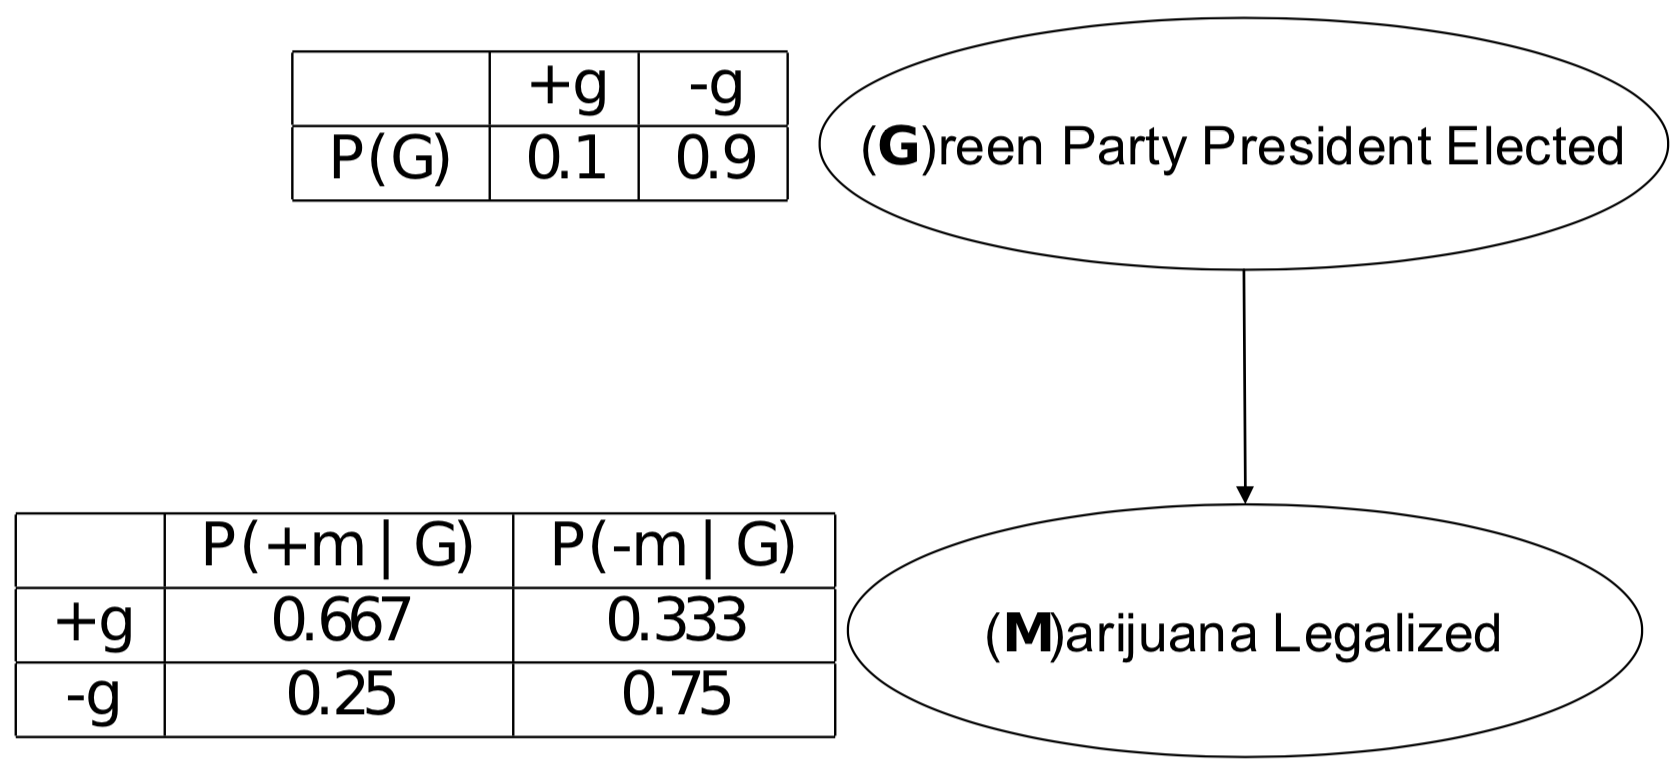
</div>


### (1a)

What is $P(+m)$, the marginal probability that marijuana is legalized?

**Solution:** $P(+m) = P(+m|+g)P(+g) + P(+m|-g)P(-g) = \frac{2}{3}*\frac{1}{10} + \frac{1}{4}*\frac{9}{10} = \frac{7}{24}$


### (1b)

News agencies air 24/7 coverage of the recent legalization of marijuana (+m), but you can't seem to find out who won the election. What is the conditional probability $P(+g | +m)$ that a Green Party president was elected?

**Solution:** $P(+g|+m) = \frac{P(+m|+g)P(+g)}{P(+m)} = \frac{\frac{2}{3}*\frac{1}{10}}{\frac{7}{24}} = \frac{48}{210} = \frac{8}{35}$


### (1c)

Fill in the joint probability table over $G$ and $M$.

| G | M |P(G,M)|
|---|---|------|
|+g |+m |$\frac{1}{15}$|
|+g |-m |$\frac{1}{30}$|
|-g |+m |$\frac{9}{40}$|
|-g |-m |$\frac{27}{40}$|

$P(+g,+m) = P(+g|+m)P(+m) = \frac{8}{35}*\frac{7}{24} = \frac{1}{15}$ \
$P(+g,-m) = P(+g|-m)P(-m) = \frac{P(-m|+g)P(+g)}{P(-m)}*P(-m) = P(-m|+g)P(+g) = \frac{1}{3}*\frac{1}{10} = \frac{1}{30}$ \
$P(-g,+m) = P(-g|+m)P(+m) = \frac{P(+m|-g)P(-g)}{P(+m)}*P(+m) = P(+m|-g)P(-g) = \frac{1}{4}*\frac{9}{10} = \frac{9}{40}$ \
$P(-g,-m) = P(-g|-m)P(-m) = \frac{P(-m|-g)P(-g)}{P(-m)}*P(-m) = P(-m|-g)P(-g) = \frac{3}{4}*\frac{9}{10} = \frac{27}{40}$

### (1d)

Now suppose we expand the model (Bayes net) by introducing two new random variables: whether the budget is balanced (B), and whether class attendance increases (C). The expanded Bayes net and conditional distributions are shown below.

<div>
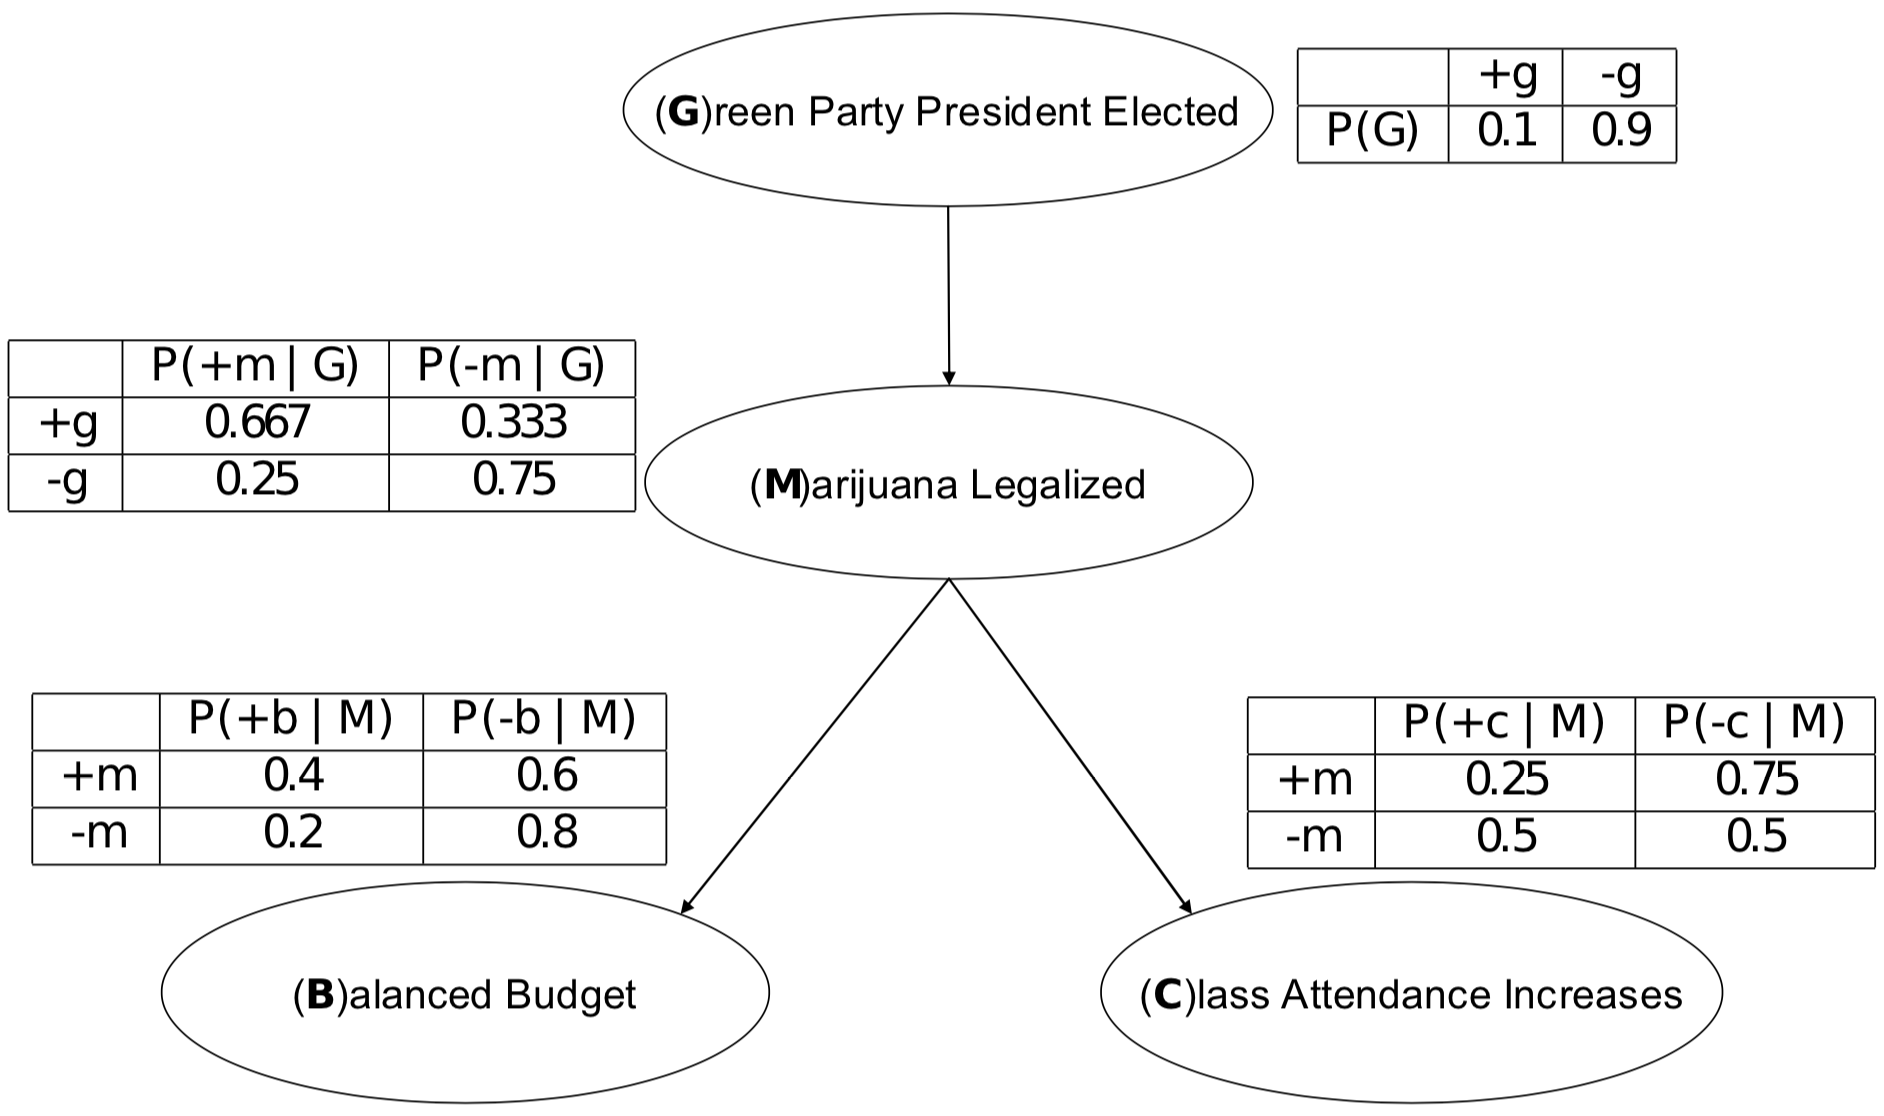
</div>


The full joint distribution is given below. Fill in the missing values.

| G | M | B | C |  P(G, M, B, C) | 
|---|---|---|---|----------------| 
| + | + | + | + |      1/150     | 
| + | + | + | - |      $\frac{1}{50}$     |
| + | + | - | + |      1/100     |
| + | + | - | - |      3/100     |
| + | - | + | + |      1/300     |
| + | - | + | - |      1/300     |
| + | - | - | + |      $\frac{1}{75}$     |
| + | - | - | - |      1/75     |
| - | + | + | + |      9/400     | 
| - | + | + | - |     27/400      |
| - | + | - | + |     27/800      |
| - | + | - | - |     81/800      |
| - | - | + | + |     $\frac{27}{400}$      |
| - | - | + | - |     27/400      |
| - | - | - | + |     27/100      |
| - | - | - | - |     $\frac{27}{100}$      |


$P(+g,+m,+b,-c) = P(+g)P(+m|+g)P(+b|+m)P(-c|+m) = \frac{1}{10}*\frac{2}{3}*\frac{4}{10}*\frac{3}{4} = \frac{24}{1200} = \frac{1}{50}$ \
$P(+g,-m,-b,+c) = P(+g)P(-m|+g)P(-b|-m)P(+c|-m) = \frac{1}{10}*\frac{1}{3}*\frac{8}{10}*\frac{5}{10} = \frac{40}{3000} = \frac{1}{75}$ \
$P(-g,-m,+b,+c) = P(-g)P(-m|-g)P(+b|-m)P(+c|-m) = \frac{9}{10}*\frac{3}{4}*\frac{2}{10}*\frac{5}{10} = \frac{270}{4000} = \frac{27}{400}$ \
$P(-g,-m,-b,-c) = P(-g)P(-m|-g)P(-b|-m)P(-c|-m) = \frac{9}{10}*\frac{3}{4}*\frac{8}{10}*\frac{5}{10} = \frac{1080}{4000} = \frac{27}{100}$

---

## Problem 2:  (15 points) Bayesian network to model heart disease

The following Bayesian network is based loosely on a study that examined heart disease risk factors in 167 elderly individuals in South Carolina.  Note that this figure uses Y and N to represent Yes and No, whereas in class we used the equivalent T and F to represent True and False Boolean values.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw05_bayesnet_heartdisease.png" style="width: 650px;"/>

<a id='p1a'></a>

### (2a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Monday (9 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* codes for a class structure are given. You are free to use these (the code from our in-class notebooks). The point of this exercise is to make sure you understand the example from class. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [2]:
## For the sake of brevity...
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))    

    
##===============================================##
## Suggested codes for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, nodes):
        '''Initialize the Bayes net by adding each of the nodes,
        which should be a list BayesNode class objects ordered
        from parents to children (`top` to `bottom`, from causes
        to effects)'''
        
        # your code goes here...
        self.nodes = []
        self.variables = []
        for node in nodes:
            self.add(*node)
        

                
    def add(self, name, parents, values, cpt):
        '''Add a new node to the BayesNet, with the given name, parents and
        conditional probability table (cpt). The parents must already be in
        the net, and the variable itself must not be.'''
        node = BayesNode(name=name, parents=parents, values=values, cpt=cpt)
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        self.nodes.append(node)
        self.variables.append(node.variable)
        for parent in node.parents:
            self.find_node(parent).children.append(node)

            
    def find_node(self, var):
        '''Find and return the BayesNode in the net with name `var`'''
        
        # your code goes here...
        for n in self.nodes:
            if n.variable == var:
                return n
        raise Exception("No such variable: {}".format(var))
    

        
    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        
        # your code goes here...
        varnode = self.find_node(var)
        return varnode.values

    
    def __repr__(self):
        return 'BayesNet({})'.format(self.nodes)

In [3]:
HD_model = BayesNet([
    ('Smoking_and_alcohol', '', [T,F], 0.2),
    ('Moderate_exercise', '', [T,F], 0.5),
    ('High_BP', ['Smoking_and_alcohol', 'Moderate_exercise'], [T,F], {(T, T): 0.6, (T, F): 0.72, (F, T): 0.33, (F, F): 0.51}),
    ('Atherosclerosis', '', [T,F], .53),
    ('Family_history', '', [T,F], .15),
    ('Heart_disease', ['High_BP', 'Atherosclerosis', 'Family_history'], [T,F], {(T, T, T): .92, (T, T, F): .91, (F, T, T): .81,
                                                                                (F, T, F): .77, (T, F, T): .75, (T, F, F): .69,
                                                                                (F, F, T): .38, (F, F, F): .23}),
    ('Angina_Pectoris', 'Heart_disease', [T,F], {T: .85, F: .4}),
    ('Rapid_heartbeat', 'Heart_disease', [T,F], {T: .99, F: .3})
])

#### Unit tests

In [4]:
class Tests_Problem2(unittest.TestCase):
    def setUp(self):
        self.p1 = BayesNode('p1', '', [T,F], 0.3)
        self.p2 = BayesNode('p2', '', [T,F], 0.6)
        self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})
    def test_onenode(self):
        self.assertEqual(P(self.p1, T), 0.3)
    def test_twonode(self):
        self.assertEqual(P(self.c, F, {'p1':T, 'p2':F}), 0.8)

In [5]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem2("test_onenode"))
tests_to_run.addTest(Tests_Problem2("test_twonode"))
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>



### (2b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

In [6]:
# Solution:

class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not np.isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''

    # Your code here.
    Q = PDF_discrete(X)
    for xi in bn.find_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
    return Q.normalize()

def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    if Y in e:
        # Y in evidence, so we know its value and just multiply
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # Y not in evidence so we have to sum (Law of Total Prob.)    
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.find_values(Y))

Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Family History` is $P(FH=T)=0.15$
2. The probability of *not* experiencing `Angina Pectoris`, given `Heart Disease` is observed, is $P(Ang=F \mid HD=T)=1-0.85=0.15$
3. The probability of `High Blood Pressure`, given a person does `Smoke and/or use Alcohol` but does not get `Moderate Exercise`, is $P(HBP=T \mid Sm=T, ME=F)=0.72$

In [7]:
# Your code here.

p1 = get_prob(X = 'Family_history', e = {}, bn = HD_model)
print("p2b1:", p1.prob[True])

p2 = get_prob(X = 'Angina_Pectoris', e = {'Heart_disease': T}, bn = HD_model)
print("p2b2:", p2.prob[False])

p3 = get_prob(X = 'High_BP', e = {'Smoking_and_alcohol': T, 'Moderate_exercise': F}, bn = HD_model)
print("p2b3:", p3.prob[True])

p2b1: 0.15
p2b2: 0.15000000000000002
p2b3: 0.7199999999999999




### (2c)

Calculate the probability of observing someone with `High Blood Pressure`, $P(HBP=T)$, *by hand*, showing all work in Markdown/LateX below.

**Solution:** \
$P(+HBP) = P(+HBP|+SM,+ME)P(+SM,+ME) + P(+HBP|+SM,-ME)P(+SM,-ME) + P(+HBP|-SM,+ME)P(-SM,+ME) + P(+HBP|-SM,-ME)P(-SM,-ME)$ \
$P(+HBP) = .6*(.2*.5) + .72*(.2*.5) + .33*(.8*.5) +.51*(.8*.5) = .468$


**Verify** your calculation using your `get_prob` function.

In [8]:
# Your code here.
p2c = get_prob(X = 'High_BP', e = {}, bn = HD_model)
print("p2c:", p2c.prob[True])

p2c: 0.4680000000000001




### (2d)

Now calculate the following probabilities using your `get_prob` function.

[i] The probability of an arbitrary individual having `Heart Disease`, $P(HD=T)$

In [9]:
# Your code here.
p2di = get_prob(X = 'Heart_disease', e = {}, bn = HD_model)
print("p2di:", p2di.prob[True])

p2di: 0.6617765600000001


[ii] The probability that an individual does *not* have `Heart Disease`, given that `Rapid Heartbeat` was observed, $P(HD=F \mid Rapid=T)$

In [10]:
# Your code here.
p2dii = get_prob(X = 'Heart_disease', e = {'Rapid_heartbeat': T}, bn = HD_model)
print("p2dii:", p2dii.prob[False])

p2dii: 0.13410463727200098


[iii] The probability of an individual having `High Blood Pressure` if they have `Heart Disease` and a `Family History`, $P(HBP=T \mid HD=T, FH=T)$

In [11]:
# Your code here.
p2diii = get_prob(X = 'High_BP', e = {'Heart_disease': T, 'Family_history': T}, bn = HD_model)
print("p2diii:", p2diii.prob[True])

p2diii: 0.5486791513343575


[iv] The probability that an individual is a `Smoker/Alcohol User` if they have `Heart Disease`, $P(Sm=T \mid HD=T)$

In [12]:
# Your code here.
p2div = get_prob(X = 'Smoking_and_alcohol', e = {'Heart_disease': T}, bn = HD_model)
print("p2div:", p2div.prob[True])

p2div: 0.2163440784303391


[v] How would you expect the probability in [iv] to change if you also know the individual has `High Blood Pressure`?  Verify your hypothesis by calculating the relevant probability.

**Solution:** I would expect it to increase, as a common side effect of smoking/drinking (according to the model) is High Blood Pressure.

In [13]:
# Your code here.
p2dv = get_prob(X = 'Smoking_and_alcohol', e = {'Heart_disease': T, 'High_BP': T}, bn = HD_model)
print("p2dv:", p2dv.prob[True])

p2dv: 0.28205128205128205


---


<img src="https://inhabitat.com/wp-content/blogs.dir/1/files/2014/02/norman-bike-riding-dog.png" style="width: 350px;"/>

## Problem 3:  (20 points) Bayesian network to model decision-making

Let's consider using a Bayesian network to model our decision about whether or not to ride our bike to work today.  This decision depends heavily on the weather, so let's focus on that.

In class, we focused on Boolean variables.  For example, we might base our biking decision on whether or not it is raining.  But in reality, it probably matters *how hard* it is raining.  So suppose we break the variable `Rain` up into three discrete bins: `none`, `light` and `heavy`.

The temperature also factors into our decision.  There is definitely a sweet spot, where temperatures are neither too warm nor too cold, so it is very likely we would enjoy riding our bike.  So we can model the variable `Temperature` also using three discrete bins: `cold`, `moderate` and `warm`.

So a Bayesian network to model our decision for whether or not to bike to work could be as follows, where the first letter of each discrete bin is used to denote that variable value (i.e., `R=h` stands for heavy rain conditions).

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/bayesnet_biking2.png" style="width: 650px;"/>


### (3a)

Modify the `P` probability function to be able to handle these ternary parent nodes.

In [14]:
# modified function for conditional probabilities,
# to handle ternary (or more) case
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents) == 0:
        # no parents
        return var.cpt[()][value]
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)

    return var.cpt[row] if value else 1-var.cpt[row]

Set up `BayesNode` objects for each of `Rain`, `Temp` and `Bike`, and create a `BayesNet` object to model the Bayesian network for this decision.  Again, you can use whatever structure you wish for your `BayesNet`, but please use the `BayesNode` class.  You may need to make minor modifications to the `BayesNode` class (e.g., changing/adding attributes), although none are strictly necessary.

In [15]:
# Set up the Bayes net
N = 'N'
L = 'L'
H = 'H'
C = 'C'
M = 'M'
W = 'W'

bike_model = BayesNet([
    ('Rain', '', ['N','L','H'], {'N': .8, 'L': .15, 'H': .05}),
    ('Temp', '', ['C','M','W'], {'C': .3, 'M': .6, 'W': .1}),
    ('Bike', ['Rain', 'Temp'], [T,F], {('N','C'): .7, ('N','M'): .99, ('N','W'): .9, 
                                       ('L','C'): .4, ('L','M'): .6, ('L','W'): .5, 
                                       ('H','C'): .2, ('H','M'): .4, ('H','W'): .3})
])

**Verify** that your modified probability function `P` is working by checking the following "unit tests". Print the output to screen and compare to what you expect from the figure above.

1. The marginal probability of no rain is $P(Rain=n)=0.8$
1. The marginal probability of light rain is $P(Rain=l)=0.15$
1. The marginal probability of heavy rain is $P(Rain=h)=0.05$
1. The probability of biking given that it is raining heavily and the temperature is cold, is $P(Bike=T \mid Rain=h, Temp=c)=0.2$

In [16]:
# Your code here.
p3a1 = P(bike_model.find_node('Rain'),'N',bike_model)
p3a2 = P(bike_model.find_node('Rain'),'L',bike_model)
p3a3 = P(bike_model.find_node('Rain'),'H',bike_model)
print("p3a1:", p3a1)
print("p3a2:", p3a2)
print("p3a3:", p3a3)

p3a4 = get_prob(X='Bike', e = {'Rain': 'H', 'Temp': 'C'}, bn = bike_model)
print("p3a4:", p3a4.prob[True])

p3a1: 0.8
p3a2: 0.15
p3a3: 0.05
p3a4: 0.2


### (3b)

(i) Use `get_prob` to calculate $P(Bike)$, the probability distribution for whether or not you will ride your bike on any given day.

In [17]:
# Your code here.
p3bi = get_prob(X = 'Bike', e = {}, bn = bike_model)
print("p3bi:", p3bi.prob[True])

p3bi: 0.8111999999999999


(ii) Use `get_prob` to calculate the probability that you will ride your bike, given that it is lightly raining.

In [18]:
# Your code here.
p3bii = get_prob(X = 'Bike', e = {'Rain': 'L'}, bn = bike_model)
print("p3bii:", p3bii.prob[True])

p3bii: 0.53



### (3c)

We are trapped indoors because some jerk gave us a ton of Intro to Artificial Intelligence homework to do.  Suppose we look out the window and see people biking. They sure do look like they're having fun! *Given* this information, we can actually make inferences regarding the temperature outside!  What is the probability distribution for temperature, given that we observe people biking?

First, compute this using your `get_prob` function.

In [19]:
# Your code here.
p3c = get_prob(X = 'Temp', e = {'Bike': T}, bn = bike_model)
print("Probability of cold temperature:", p3c.prob['C'])
print("Probability of moderate temperature:", p3c.prob['M'])
print("Probability of warm temperature:", p3c.prob['W'])

Probability of cold temperature: 0.2329881656804734
Probability of moderate temperature: 0.6671597633136096
Probability of warm temperature: 0.09985207100591718




### (3d)

Confirm your answer to **2c** by hand, showing *all* relevant work below in a LateX/Markdown cell.

**Solution:** $P(Bike=T) =$\
$P(Bike=T|Rain=N,Temp=C)P(Rain=N,Temp=C) + P(Bike=T|Rain=N,Temp=M)P(Rain=N,Temp=M) +$\
$P(Bike=T|Rain=N,Temp=W)P(Rain=N,Temp=W) + P(Bike=T|Rain=L,Temp=C)P(Rain=L,Temp=C) +$\
$P(Bike=T|Rain=L,Temp=M)P(Rain=L,Temp=M) + P(Bike=T|Rain=L,Temp=C)P(Rain=L,Temp=W) +$\
$P(Bike=T|Rain=H,Temp=C)P(Rain=H,Temp=C) + P(Bike=T|Rain=H,Temp=M)P(Rain=H,Temp=M) +$\
$P(Bike=T|Rain=H,Temp=C)P(Rain=H,Temp=W) =$\
$(.7)(.8)(.3) + (.99)(.8)(.6) + (.9)(.8)(.1) + (.4)(.15)(.3) + (.6)(.15)(.6) + (.5)(.15)(.1) + (.2)(.05)(.3) + (.4)(.05)(.6) +  (.3)(.05)(.1) =$\
$.168 + .4752 + .072 + .018 + .054 + .0075 + .003 + .012 + .0015 = .8112$\
\
**Probability of cold temperature:**\
$P(Temp=C|Bike=T) = \frac{P(Bike=T|Temp=C)*P(Temp=C)}{P(Bike=T)} = \frac{( P(Bike=T|Temp=C,Rain=N)*P(Rain=N) + P(Bike=T|Temp=C,Rain=L)*P(Rain=L) + P(Bike=T|Temp=C, Rain=H)*P(Rain=H) ) * P(Temp=C)}{P(Bike=T)}$\
$P(Temp=C|Bike=T) = \frac{(.7*.8+.4*.15+.2*.05)*.3}{.8112} = .2329881657$\
\
**Probability of moderate temperature:**\
$P(Temp=M|Bike=T) = \frac{P(Bike=T|Temp=M)*P(Temp=M)}{P(Bike=T)} = \frac{( P(Bike=T|Temp=M,Rain=N)*P(Rain=N) + P(Bike=T|Temp=M,Rain=L)*P(Rain=L) + P(Bike=T|Temp=M, Rain=H)*P(Rain=H) ) * P(Temp=M)}{P(Bike=T)}$\
$P(Temp=M|Bike=T) = \frac{(.99*.8+.6*.15+.4*.05)*.6}{.8112} = .6671597633$\
\
**Probability of warm temperature:**\
$P(Temp=W|Bike=T) = \frac{P(Bike=T|Temp=W)*P(Temp=W)}{P(Bike=T)} = \frac{( P(Bike=T|Temp=W,Rain=N)*P(Rain=N) + P(Bike=T|Temp=W,Rain=L)*P(Rain=L) + P(Bike=T|Temp=W, Rain=H)*P(Rain=H) ) * P(Temp=W)}{P(Bike=T)}$\
$P(Temp=W|Bike=T) = \frac{(.9*.8+.5*.15+.3*.05)*.1}{.8112} = .099852071$